**Assignment-1**
**Neural Networks**

**##Installing the TensorFlow library using pip in a Jupyter Notebook**

In [4]:
!pip install tensorflow

**Load the IMDB dataset, selecting the 10,000 most commonly occurring words, for use in training and testing a sentiment analysis model.**

In [5]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**# Displaying the train_data along with its shape (dimensions)**

In [6]:
print(train_data,train_data.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [8]:
train_labels[0] ## Accessing the first label in the train_labels dataset
len(train_labels) ## Getting the total number of labels in the training dataset
test_labels[0] ## Accessing the first label in the test_labels dataset
max([max(sequence_647) for sequence_647 in test_data]) ## Finding the maximum word index in the test_data sequences

9999

**Convert the word indices back to words using the reverse word index to decode the first review from the training dataset.**

In [8]:
word_index_647 = imdb.get_word_index()
reverse_word_index_647 = dict(
    [(value, key) for (key, value) in word_index_647.items()])
decoded_review = " ".join(
    [reverse_word_index_647.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Transforms each sequence of integers into a binary vector of a defined dimension, setting the corresponding index to 1 if the word appears in the sequence.**

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data) # Converting training data into binary vector representations
x_test = vectorize_sequences(test_data) # Converting test data into binary vector representations

In [11]:
x_train[0] # Displaying the first vectorized review from the training dataset

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
x_test[0] # Displaying the first vectorized review from the test data

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype("float32") # Converting training labels into a NumPy array with float32 data type
y_test = np.asarray(test_labels).astype("float32") # Converting test labels into a NumPy array with float32 data type

**# Creating a neural network model with three layers: two hidden layers with ReLU activation and an output layer with a sigmoid activation for binary classification.**

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

model647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**# Compiling the model with RMSprop optimizer, binary cross-entropy loss function, and accuracy as the evaluation metric.**

In [15]:
model647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Splitting the training data into validation and training sets, using the first 10,000 samples for validation.**

In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the model for 20 epochs with a batch size of 512 and using validation data for monitoring performance.**

In [17]:
## model planned to train with 20 epoch with batch size of 256
history = model647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.7184 - loss: 0.5933 - val_accuracy: 0.8653 - val_loss: 0.3948
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8916 - loss: 0.3392 - val_accuracy: 0.8791 - val_loss: 0.3136
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9177 - loss: 0.2497 - val_accuracy: 0.8797 - val_loss: 0.2978
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9350 - loss: 0.1985 - val_accuracy: 0.8895 - val_loss: 0.2750
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9508 - loss: 0.1578 - val_accuracy: 0.8824 - val_loss: 0.2922
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9548 - loss: 0.1415 - val_accuracy: 0.8854 - val_loss: 0.2917
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9636 - loss: 0.1179 - val_accuracy: 0.8864 - val_loss: 0.2943
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9697 - loss: 0.1007 - val_accuracy: 0.8833 - v

**# Retrieving and displaying the keys of the history dictionary to access training and validation metrics.**

In [18]:
history_dict647 = history.history
history_dict647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting the training and validation loss over epochs to visualize model performance during training.**

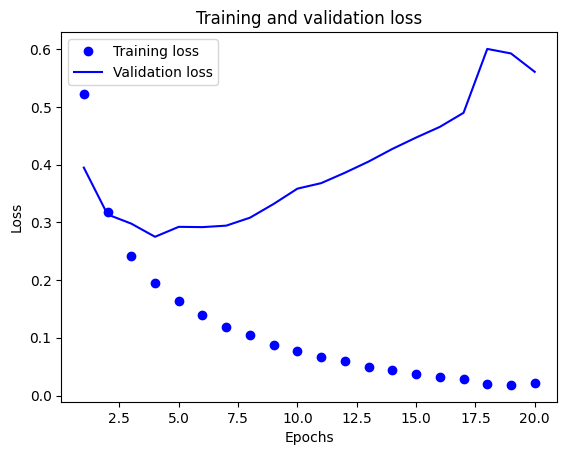

In [19]:
#Plotting the training loss vs validation loss
import matplotlib.pyplot as plot647
history_dict647 = history.history
loss_values = history_dict647["loss"]
val_loss_values = history_dict647["val_loss"]
epochs = range(1, len(loss_values) + 1)
plot647.plot(epochs, loss_values, "bo", label="Training loss")
plot647.plot(epochs, val_loss_values, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

**# Plotting the training and validation accuracy over epochs to evaluate the model's performance on both datasets.**

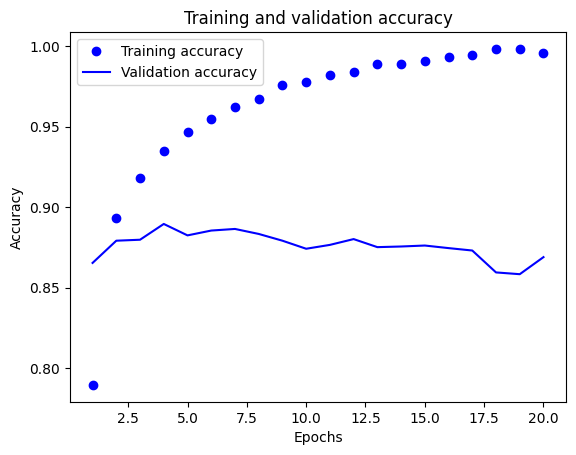

In [20]:
#Plotting training accuracy vs validatition accuracy
plot647.clf()
acc = history_dict647["accuracy"]
val_acc = history_dict647["val_accuracy"]
plot647.plot(epochs, acc, "bo", label="Training accuracy")
plot647.plot(epochs, val_acc, "b", label="Validation accuracy")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Defining, compiling, and training a neural network model with two hidden layers, then evaluating its performance on the test data.**

In [21]:
model647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model647.fit(x_train, y_train, epochs=4, batch_size=512)
results = model647.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7321 - loss: 0.5830
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9000 - loss: 0.3073
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9183 - loss: 0.2293
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9334 - loss: 0.1907
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8862 - loss: 0.2828


In [22]:
results #Displaying the results

[0.28102514147758484, 0.888480007648468]

**# Using the trained model to make predictions on the test data.**

In [23]:
model647.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.23334053],
       [0.9991537 ],
       [0.87785053],
       ...,
       [0.13598225],
       [0.09242532],
       [0.6118001 ]], dtype=float32)

**# Defining, compiling, and training a simplified neural network model with one hidden layer, and using a validation set for performance monitoring.**

In [24]:
model_647_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_647_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

x_val647 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val647 = y_train[:10000]
partial_y_train = y_train[10000:]


history_layer647 = model_647_layer.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val647, y_val647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7120 - loss: 0.5766 - val_accuracy: 0.8737 - val_loss: 0.3871
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9010 - loss: 0.3321 - val_accuracy: 0.8841 - val_loss: 0.3180
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9186 - loss: 0.2602 - val_accuracy: 0.8851 - val_loss: 0.2967
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9352 - loss: 0.2152 - val_accuracy: 0.8894 - val_loss: 0.2794
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9423 - loss: 0.1888 - val_accuracy: 0.8880 - val_loss: 0.2786
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9492 - loss: 0.1681 - val_accuracy: 0.8862 - val_loss: 0.2810
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9557 - loss: 0.1478 - val_accuracy: 0.8860 - val_loss: 0.2771
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9617 - loss: 0.1328 - val_accuracy: 0.8865 - v

**Retrieve the training history from history_layer647 and show the keys of the history dictionary.**

In [25]:
history_dict647 = history_layer647.history
history_dict647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting the training and validation loss, followed by the training and validation accuracy over epochs to visualize model performance.**

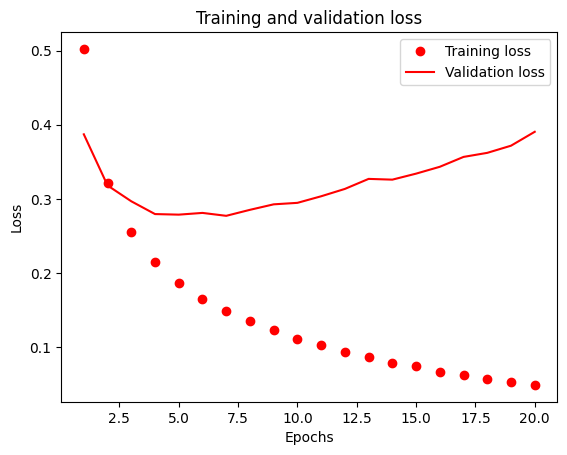

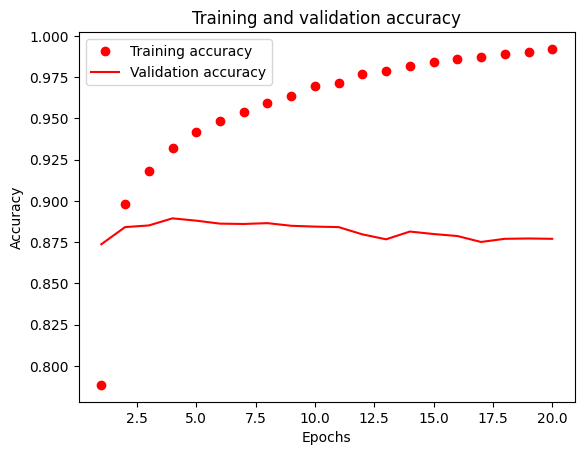

In [26]:
import matplotlib.pyplot as plot647
history_dict647 = history_layer647.history
loss_value647 = history_dict647["loss"]
val_loss_value647 = history_dict647["val_loss"]
epochs647 = range(1, len(loss_value647) + 1)

#Plotting graph of Training and Validation loss
plot647.plot(epochs647, loss_value647, "ro", label="Training loss")
plot647.plot(epochs647, val_loss_value647, "r", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

#Plotting graph of Training and Validation Accuracy
plot647.clf()
accuracy647 = history_dict647["accuracy"]
val_accuracy1 = history_dict647["val_accuracy"]
plot647.plot(epochs647, accuracy647, "ro", label="Training accuracy")
plot647.plot(epochs647, val_accuracy1, "r", label="Validation accuracy")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Defining, compiling, and training a simplified neural network model for binary classification, followed by evaluating its performance on the test data.**

In [27]:
model_647_layer = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_647_layer.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model_647_layer.fit(x_train, y_train, epochs=5, batch_size=512)
result_647_layer = model_647_layer.evaluate(x_test, y_test)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7509 - loss: 0.5489
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8972 - loss: 0.3098
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9200 - loss: 0.2383
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9291 - loss: 0.2095
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9386 - loss: 0.1825
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8853 - loss: 0.2802


**# Printing the evaluation results (loss and accuracy) of the model on the test data.**

In [28]:
print(result_647_layer)

[0.27949032187461853, 0.8871999979019165]


**# Using the trained model to make predictions on the test data.**

In [29]:
model_647_layer.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.20644897],
       [0.9996556 ],
       [0.59752214],
       ...,
       [0.10031941],
       [0.07974253],
       [0.47744647]], dtype=float32)

**# Defining, compiling, and training a neural network model with three hidden layers, and using a validation set for performance monitoring.**

In [30]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_layers_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val3_647 = x_train[:10000]
partial_x_train_647 = x_train[10000:]

y_val3_647 = y_train[:10000]
partial_y_train_647 = y_train[10000:]

history_3_layers_647 = model_3_layers_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val3_647, y_val3_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6264 - loss: 0.6322 - val_accuracy: 0.8568 - val_loss: 0.3973
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8913 - loss: 0.3313 - val_accuracy: 0.8861 - val_loss: 0.3035
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9215 - loss: 0.2347 - val_accuracy: 0.8862 - val_loss: 0.2841
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9415 - loss: 0.1799 - val_accuracy: 0.8778 - val_loss: 0.3033
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9558 - loss: 0.1396 - val_accuracy: 0.8547 - val_loss: 0.3942
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9639 - loss: 0.1165 - val_accuracy: 0.8765 - val_loss: 0.3220
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9719 - loss: 0.0938 - val_accuracy: 0.8783 - val_loss: 0.3481
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9806 - loss: 0.0781 - val_accuracy: 0.8720 - v

**# Extracting and displaying the keys of the training history dictionary for the model with three hidden layers.**

In [31]:
history_dict_3_647 = history_3_layers_647.history
history_dict_3_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting the training and validation loss, followed by the training and validation accuracy over epochs for the model with three hidden layers.**

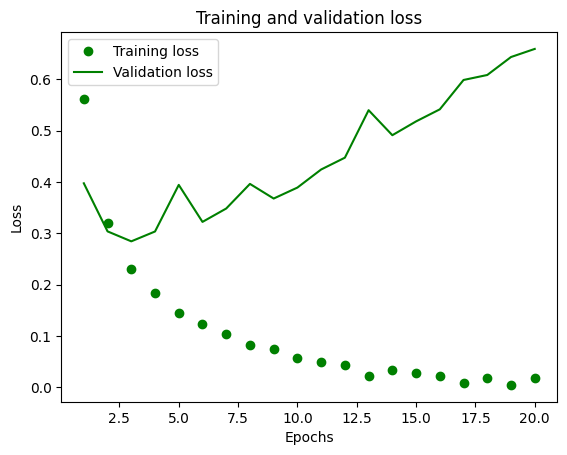

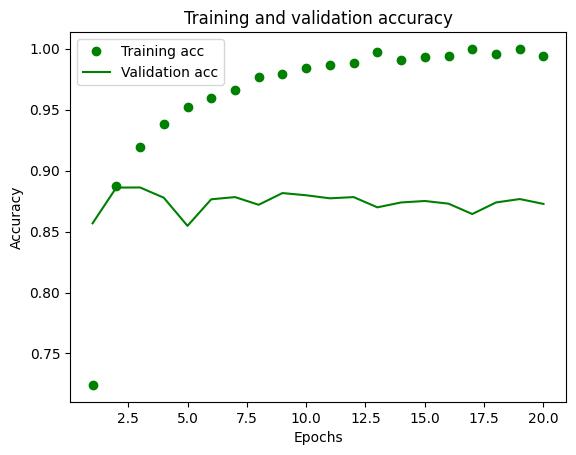

In [32]:
loss_val647 = history_dict_3_647["loss"]
val_loss_val3 = history_dict_3_647["val_loss"]
epochs3 = range(1, len(loss_val647) + 1)
plot647.plot(epochs3, loss_val647, "go", label="Training loss")
plot647.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy3 = history_dict_3_647["accuracy"]
val_accuracy3 = history_dict_3_647["val_accuracy"]
plot647.plot(epochs3, accuracy3, "go", label="Training acc")
plot647.plot(epochs3, val_accuracy3, "g", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Defining, compiling, and training a neural network model with three hidden layers, followed by evaluating its performance on the test data.**

In [33]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3_layers_647.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3_layers_647.fit(x_train, y_train, epochs=3, batch_size=512)
results_3_layers = model_3_layers_647.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7183 - loss: 0.5715
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9033 - loss: 0.2742
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9293 - loss: 0.2030
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8860 - loss: 0.2860


In [34]:
print(result_647_layer) # Printing the test evaluation results (loss and accuracy) of the previously trained model.


[0.27949032187461853, 0.8871999979019165]


In [35]:
model_647_layer.predict(x_test) # Generating predictions on the test data using the trained model.


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.20644897],
       [0.9996556 ],
       [0.59752214],
       ...,
       [0.10031941],
       [0.07974253],
       [0.47744647]], dtype=float32)

**# Building, compiling, and training a neural network with three hidden layers, using a validation set to monitor performance over 20 epochs.**

In [36]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_3_layers_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
x_val3_647 = x_train[:10000]
partial_x_train_647 = x_train[10000:]

y_val3_647 = y_train[:10000]
partial_y_train_647 = y_train[10000:]

history_3_layers_647 = model_3_layers_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val3_647, y_val3_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6555 - loss: 0.6378 - val_accuracy: 0.8562 - val_loss: 0.4364
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8821 - loss: 0.3805 - val_accuracy: 0.8594 - val_loss: 0.3523
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9129 - loss: 0.2678 - val_accuracy: 0.8891 - val_loss: 0.2867
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9348 - loss: 0.1993 - val_accuracy: 0.8873 - val_loss: 0.2831
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9478 - loss: 0.1632 - val_accuracy: 0.8827 - val_loss: 0.2904
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9557 - loss: 0.1357 - val_accuracy: 0.8821 - val_loss: 0.3008
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9669 - loss: 0.1087 - val_accuracy: 0.8868 - val_loss: 0.3010
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9756 - loss: 0.0906 - val_accuracy: 0.8846 - v

**# Extracting and displaying the keys of the training history dictionary for the three-layer model.**

In [37]:
history_dict_3_647 = history_3_layers_647.history
history_dict_3_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting training and validation loss, followed by training and validation accuracy over epochs for the three-layer model.**

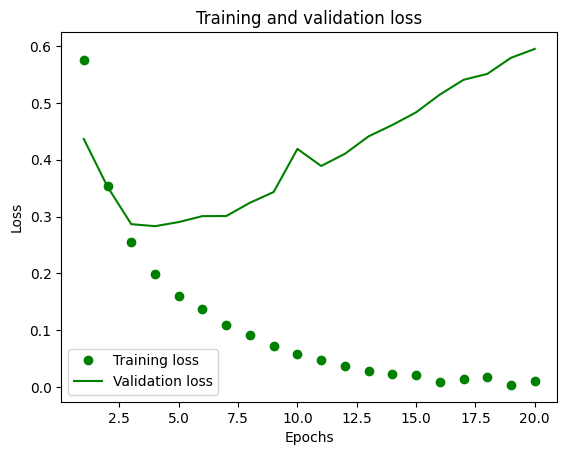

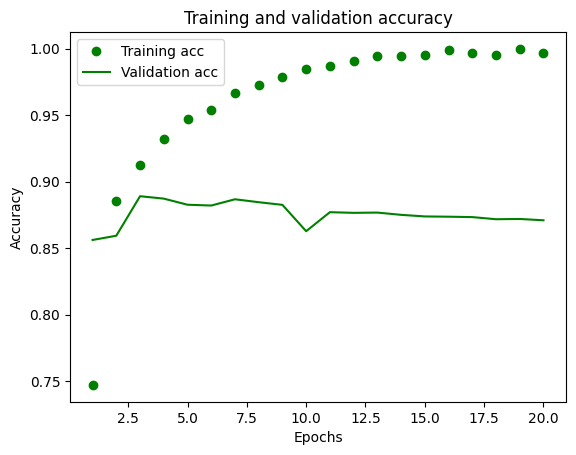

In [38]:
loss_val647 = history_dict_3_647["loss"]
val_loss_val3 = history_dict_3_647["val_loss"]
epochs3 = range(1, len(loss_val647) + 1)
plot647.plot(epochs3, loss_val647, "go", label="Training loss")
plot647.plot(epochs3, val_loss_val3, "g", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy3 = history_dict_3_647["accuracy"]
val_accuracy3 = history_dict_3_647["val_accuracy"]
plot647.plot(epochs3, accuracy3, "go", label="Training acc")
plot647.plot(epochs3, val_accuracy3, "g", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Defining, compiling, training a three-hidden-layer neural network for three epochs, and evaluating its performance on the test data.**

In [39]:
model_3_layers_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


model_3_layers_647.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_3_layers_647.fit(x_train, y_train, epochs=3, batch_size=512)
results_3_layers = model_3_layers_647.evaluate(x_test, y_test)

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7151 - loss: 0.5616
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9080 - loss: 0.2649
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9334 - loss: 0.1924
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8724 - loss: 0.3203


In [40]:
print(results_3_layers) # Printing the evaluation results (loss and accuracy) of the three-layer model on the test data.


[0.3158565163612366, 0.8740400075912476]


In [41]:
model_3_layers_647.predict(x_test) # Generating predictions on the test data using the trained three-layer model.

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.2887889 ],
       [0.9992645 ],
       [0.99066985],
       ...,
       [0.18958339],
       [0.14366959],
       [0.8326748 ]], dtype=float32)

**# Building, compiling, and training a neural network with three hidden layers of 32 units each, using a validation set over 20 epochs.**

In [42]:
model_32_units_647 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#model compilation
model_32_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
#model validation
x_val_32_647 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_32_647 = y_train[:10000]
partial_y_train = y_train[10000:]


history_32_units_647 = model_32_units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_32_647, y_val_32_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.6641 - loss: 0.6107 - val_accuracy: 0.7929 - val_loss: 0.4460
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.8800 - loss: 0.3262 - val_accuracy: 0.8766 - val_loss: 0.3104
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9150 - loss: 0.2341 - val_accuracy: 0.8906 - val_loss: 0.2746
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9356 - loss: 0.1815 - val_accuracy: 0.8657 - val_loss: 0.3407
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9487 - loss: 0.1470 - val_accuracy: 0.8858 - val_loss: 0.2942
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9566 - loss: 0.1218 - val_accuracy: 0.8811 - val_loss: 0.3147
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9704 - loss: 0.0952 - val_accuracy: 0.8800 - val_loss: 0.3504
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9745 - loss: 0.0783 - val_accuracy: 0.8788 - v

**# Extracting the training history from the model and displaying the available metrics recorded during training.**

In [43]:
history_dict_32_647 = history_32_units_647.history
history_dict_32_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting the training and validation loss, followed by the training and validation accuracy over epochs for the model with 32 units in each layer.**

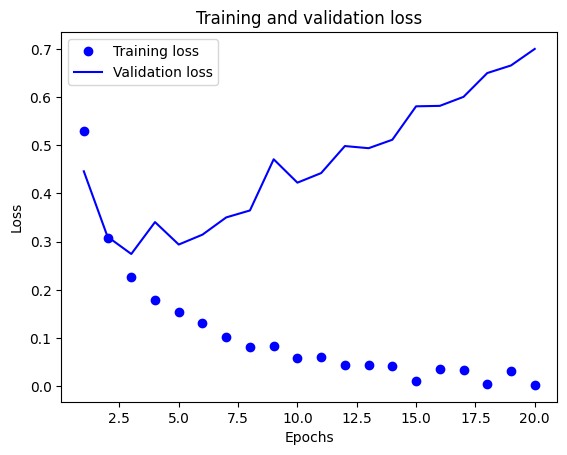

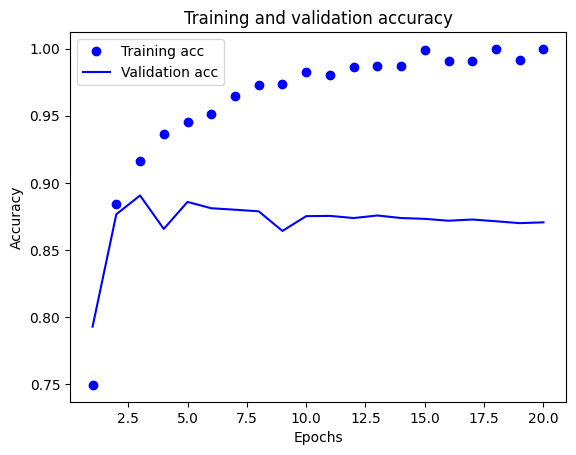

In [44]:
loss_value_32_647 = history_dict_32_647["loss"]
val_loss_value_32_647 = history_dict_32_647["val_loss"]
epochs_32 = range(1, len(loss_value_32_647) + 1)
plot647.plot(epochs_32, loss_value_32_647, "bo", label="Training loss")
plot647.plot(epochs_32, val_loss_value_32_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy_32 = history_dict_32_647["accuracy"]
val_accuracy_32 = history_dict_32_647["val_accuracy"]
plot647.plot(epochs_32, accuracy_32, "bo", label="Training acc")
plot647.plot(epochs_32, val_accuracy_32, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

In [45]:
history_32_units_647 = model_32_units_647.fit(x_train, y_train, epochs=3, batch_size=512) # Training the model with 32 units in each layer for 3 epochs and a batch size of 512 on the training data.
results_32_units_647 = model_32_units_647.evaluate(x_test, y_test) # Evaluating the performance of the model on the test data and storing the results.
results_32_units_647 # Displaying the evaluation results (loss and accuracy) of the model on the test data.


Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9377 - loss: 0.2603
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.9628 - loss: 0.1225
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9742 - loss: 0.0813
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8646 - loss: 0.4105


[0.40794897079467773, 0.8654400110244751]

**# Building, compiling, and training a neural network with two hidden layers of 64 units each, using a validation set over 20 epochs.**

In [46]:
model_64_units_647 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_64_2 = x_train[:10000]
partial_x_train_64_2 = x_train[10000:]

y_val_64_2 = y_train[:10000]
partial_y_train_64_2 = y_train[10000:]

history_64_647 = model_64_units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_64_2, y_val_64_2))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.7081 - loss: 0.5794 - val_accuracy: 0.8703 - val_loss: 0.3420
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.8771 - loss: 0.3146 - val_accuracy: 0.8795 - val_loss: 0.2939
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9217 - loss: 0.2123 - val_accuracy: 0.8542 - val_loss: 0.3624
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9300 - loss: 0.1879 - val_accuracy: 0.8858 - val_loss: 0.2851
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9506 - loss: 0.1415 - val_accuracy: 0.8784 - val_loss: 0.3201
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9580 - loss: 0.1154 - val_accuracy: 0.8858 - val_loss: 0.3087
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9710 - loss: 0.0898 - val_accuracy: 0.8822 - val_loss: 0.3338
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - accuracy: 0.9737 - loss: 0.0846 - val_accuracy: 0.8805 - 

**# Extracting the training history from the model with 64 units and displaying the available metrics recorded during training.**

In [47]:
history_dict_64_647 = history_64_647.history
history_dict_64_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Building, compiling, and training a neural network with two hidden layers of 64 units each, using a validation set for 20 epochs.**

In [48]:
model_64_units_647 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_64_units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_64_2 = x_train[:10000]
partial_x_train_64_2 = x_train[10000:]

y_val_64_2 = y_train[:10000]
partial_y_train_64_2 = y_train[10000:]

history_64_647 = model_64_units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_64_2, y_val_64_2))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.6845 - loss: 0.6016 - val_accuracy: 0.8523 - val_loss: 0.3760
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.8720 - loss: 0.3301 - val_accuracy: 0.8863 - val_loss: 0.2891
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9146 - loss: 0.2283 - val_accuracy: 0.8783 - val_loss: 0.3011
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9284 - loss: 0.1909 - val_accuracy: 0.8834 - val_loss: 0.2858
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9375 - loss: 0.1681 - val_accuracy: 0.8817 - val_loss: 0.3145
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.9550 - loss: 0.1271 - val_accuracy: 0.8853 - val_loss: 0.2987
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.9710 - loss: 0.0955 - val_accuracy: 0.8788 - val_loss: 0.3274
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9726 - loss: 0.0826 - val_accuracy: 0.8755 -

**# Extracting and displaying the keys of the training history dictionary for the model with 64 units.**

In [49]:
history_dict_64_647 = history_64_647.history
history_dict_64_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting the training and validation loss, followed by the training and validation accuracy for the model with 64 units.**

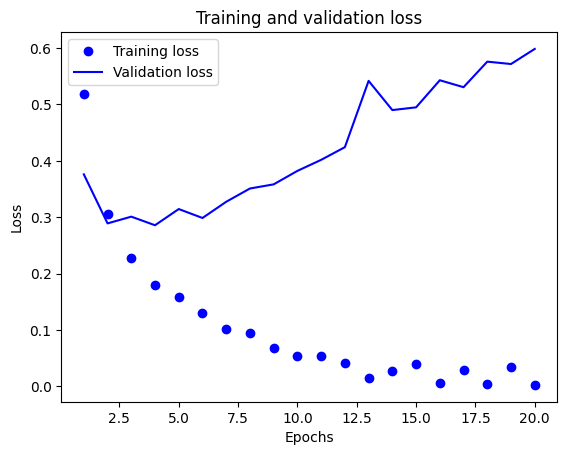

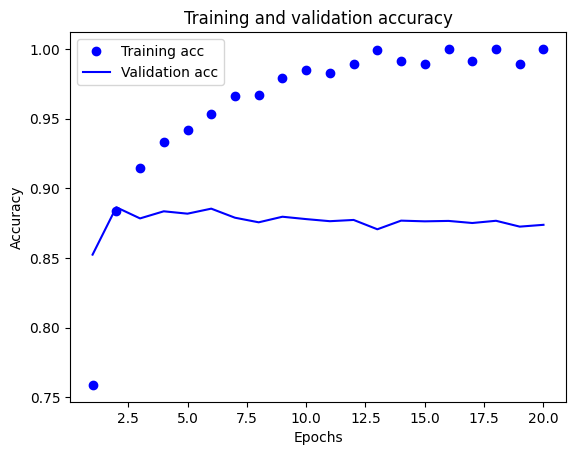

In [50]:
loss_value64 = history_dict_64_647["loss"]
val_loss_value64 = history_dict_64_647["val_loss"]
epochs_64 = range(1, len(loss_value64) + 1)
plot647.plot(epochs_64, loss_value64, "bo", label="Training loss")
plot647.plot(epochs_64, val_loss_value64, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
accuracy_64 = history_dict_64_647["accuracy"]
val_accuracy_64 = history_dict_64_647["val_accuracy"]
plot647.plot(epochs_64, accuracy_64, "bo", label="Training acc")
plot647.plot(epochs_64, val_accuracy_64, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Training the model with 64 units for 3 epochs and evaluating the performance on the test set.**

In [51]:
history_64_647 = model_64_units_647.fit(x_train, y_train, epochs=3, batch_size=512)
results_64_units_647 = model_64_units_647.evaluate(x_test, y_test)
results_64_units_647

Epoch 1/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9468 - loss: 0.2084
Epoch 2/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.9694 - loss: 0.0968
Epoch 3/3
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9840 - loss: 0.0572
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8618 - loss: 0.4203


[0.4104676842689514, 0.8658000230789185]

In [52]:
model_64_units_647.predict(x_test) # Predicting the output using the trained model with 64 units on the test set.

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


array([[0.056929  ],
       [0.99999994],
       [0.96342087],
       ...,
       [0.16129674],
       [0.0199403 ],
       [0.9147184 ]], dtype=float32)

**# Creating and training a model with 128 units in each layer, validating with a subset of the training data.**

In [53]:
model_128units_647 = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model_128units_647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
# validation
x_val_128_647 = x_train[:10000]
partial_x_train_647 = x_train[10000:]

y_val_128_647 = y_train[:10000]
partial_y_train_647 = y_train[10000:]

history_128_3 = model_128units_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_128_647, y_val_128_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.6681 - loss: 0.6182 - val_accuracy: 0.7901 - val_loss: 0.4603
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8705 - loss: 0.3283 - val_accuracy: 0.8056 - val_loss: 0.4444
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9115 - loss: 0.2335 - val_accuracy: 0.8834 - val_loss: 0.2878
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.9418 - loss: 0.1608 - val_accuracy: 0.8784 - val_loss: 0.3082
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.9472 - loss: 0.1410 - val_accuracy: 0.8835 - val_loss: 0.3076
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9667 - loss: 0.1031 - val_accuracy: 0.8836 - val_loss: 0.3570
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - accuracy: 0.9780 - loss: 0.0740 - val_accuracy: 0.8822 - val_loss: 0.3825
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9853 - loss: 0.0541 - val_accuracy: 0.

**# Extracting and displaying the keys of the training history for the model with 128 units.**

In [54]:
history_dict_128_3 = history_128_3.history
history_dict_128_3.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting training and validation loss, followed by training and validation accuracy for the model with 128 units.**

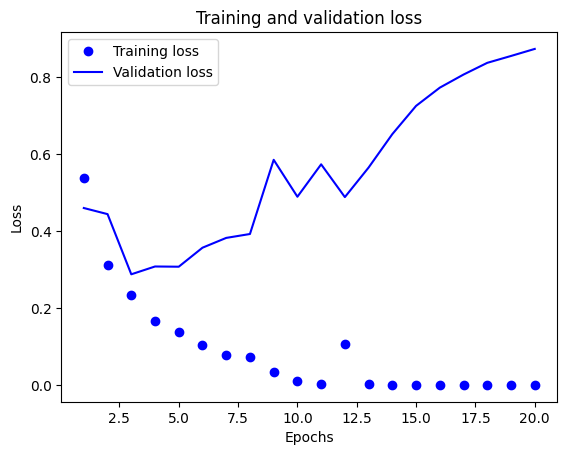

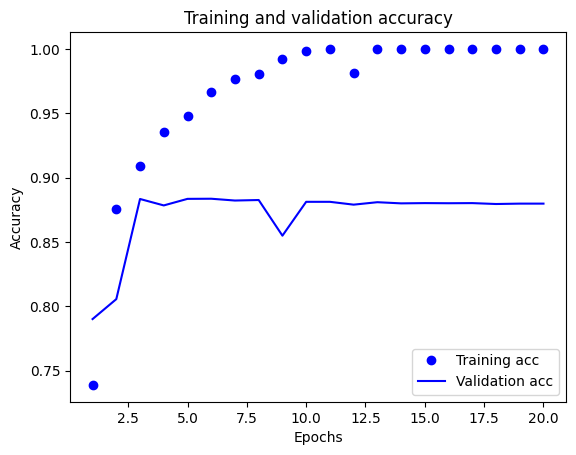

In [55]:
loss_value128_3 = history_dict_128_3["loss"]
val_loss_value128_3 = history_dict_128_3["val_loss"]
epochs_128 = range(1, len(loss_value128_3) + 1)
plot647.plot(epochs_128, loss_value128_3, "bo", label="Training loss")
plot647.plot(epochs_128, val_loss_value128_3, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
accuracy_128 = history_dict_128_3["accuracy"]
val_accuracy_128 = history_dict_128_3["val_accuracy"]
plot647.plot(epochs_128, accuracy_128, "bo", label="Training acc")
plot647.plot(epochs_128, val_accuracy_128, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Training the model with 128 units for 2 epochs and evaluating its performance on the test set.**

In [56]:
history_128_3 = model_128units_647.fit(x_train, y_train, epochs=2, batch_size=512)
results_128_units_3 = model_128units_647.evaluate(x_test, y_test)
results_128_units_3

Epoch 1/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.9251 - loss: 0.4173
Epoch 2/2
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.9713 - loss: 0.0868
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8740 - loss: 0.3972


[0.39473628997802734, 0.8768399953842163]

In [57]:
model_128units_647.predict(x_test) # Predicting the output for the test data using the trained model with 128 units.


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([[0.00944366],
       [1.        ],
       [0.7818167 ],
       ...,
       [0.01277798],
       [0.00162015],
       [0.9119414 ]], dtype=float32)

MSE Loss Function model with 16 units and 3-layers

**# Defining, compiling, and training a model with 16 units using Mean Squared Error (MSE) as the loss function for 20 epochs.**

In [58]:
MSE_model_16_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
# compilation of model
MSE_model_16_647.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
# validation of model
x_val_MSE_16 = x_train[:10000]
partial_x_train_16 = x_train[10000:]

y_val_MSE_16 = y_train[:10000]
partial_y_train_16 = y_train[10000:]
# Model Fit

history_MSE_647 = MSE_model_16_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_MSE_16, y_val_MSE_16))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.6727 - loss: 0.2204 - val_accuracy: 0.8594 - val_loss: 0.1409
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8798 - loss: 0.1214 - val_accuracy: 0.8838 - val_loss: 0.1024
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9118 - loss: 0.0834 - val_accuracy: 0.8684 - val_loss: 0.0993
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9276 - loss: 0.0648 - val_accuracy: 0.8735 - val_loss: 0.0936
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9443 - loss: 0.0521 - val_accuracy: 0.8875 - val_loss: 0.0840
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9546 - loss: 0.0441 - val_accuracy: 0.8877 - val_loss: 0.0825
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9646 - loss: 0.0371 - val_accuracy: 0.8859 - val_loss: 0.0835
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9690 - loss: 0.0318 - val_accuracy: 0.8847 - v

**# Extracting and displaying the keys from the history dictionary of the MSE model.**

In [59]:
historydict_MSE_647 = history_MSE_647.history
historydict_MSE_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting the training and validation loss, followed by training and validation accuracy for the MSE model.**

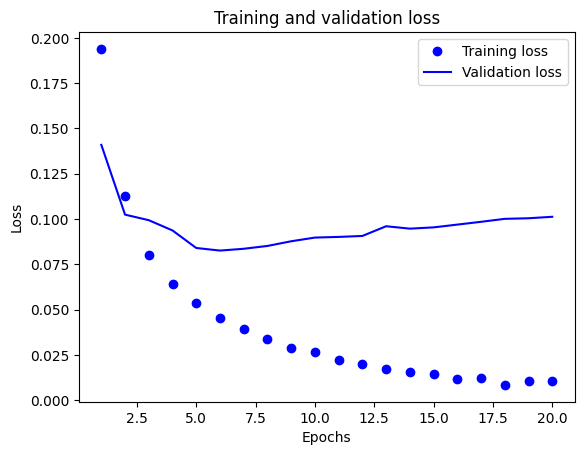

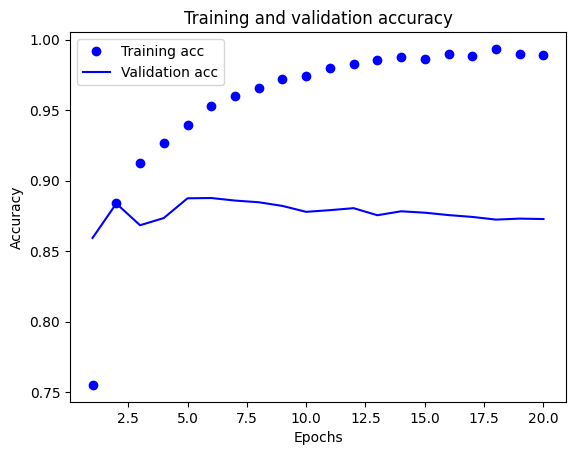

In [60]:
import matplotlib.pyplot as plot647
loss_value_MSE_16_3 = historydict_MSE_647["loss"]
val_loss_value_MSE_16_3 = historydict_MSE_647["val_loss"]
epochs_MSE = range(1, len(loss_value_MSE_16_3) + 1)
plot647.plot(epochs_MSE, loss_value_MSE_16_3, "bo", label="Training loss")
plot647.plot(epochs_MSE, val_loss_value_MSE_16_3, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_MSE = historydict_MSE_647["accuracy"]
val_acc_MSE = historydict_MSE_647["val_accuracy"]
plot647.plot(epochs_MSE, acc_MSE, "bo", label="Training acc")
plot647.plot(epochs_MSE, val_acc_MSE, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Training the MSE model for 8 epochs and evaluating its performance on the test set.**

In [61]:
MSE_model_16_647.fit(x_train, y_train, epochs=8, batch_size=512)
results_MSE_647 = MSE_model_16_647.evaluate(x_test, y_test)
results_MSE_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9467 - loss: 0.0442
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9621 - loss: 0.0342
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9695 - loss: 0.0292
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9721 - loss: 0.0269
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9761 - loss: 0.0237
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9813 - loss: 0.0191
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9806 - loss: 0.0195
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9821 - loss: 0.0177
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8622 - loss: 0.1141


[0.11139561235904694, 0.8662800192832947]

In [62]:
MSE_model_16_647.predict(x_test) # Predicting the output using the trained MSE model on the test data.


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.01404752],
       [0.99999624],
       [0.78736985],
       ...,
       [0.17270125],
       [0.00390387],
       [0.7782587 ]], dtype=float32)

**# Defining and training a neural network model using the 'tanh' activation function and 'mse' loss.**

In [63]:
tanh_647 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

tanh_647.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

x_val_tanh = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_tanh = y_train[:10000]
partial_y_train = y_train[10000:]


historytanh_model = tanh_647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_tanh, y_val_tanh))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7109 - loss: 0.2014 - val_accuracy: 0.8227 - val_loss: 0.1441
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8798 - loss: 0.1181 - val_accuracy: 0.8703 - val_loss: 0.1108
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9083 - loss: 0.0905 - val_accuracy: 0.8829 - val_loss: 0.0962
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9239 - loss: 0.0737 - val_accuracy: 0.8793 - val_loss: 0.0934
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.9291 - loss: 0.0674 - val_accuracy: 0.8821 - val_loss: 0.0891
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9378 - loss: 0.0583 - val_accuracy: 0.8759 - val_loss: 0.0930
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9419 - loss: 0.0539 - val_accuracy: 0.8863 - val_loss: 0.0852
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9486 - loss: 0.0488 - val_accuracy: 0.8860 - v

**# Retrieving and displaying the keys of the history dictionary for the tanh model.**

In [64]:
historydict_tanh_647 = historytanh_model.history
historydict_tanh_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting the training and validation loss, and accuracy for the tanh model over epochs.**

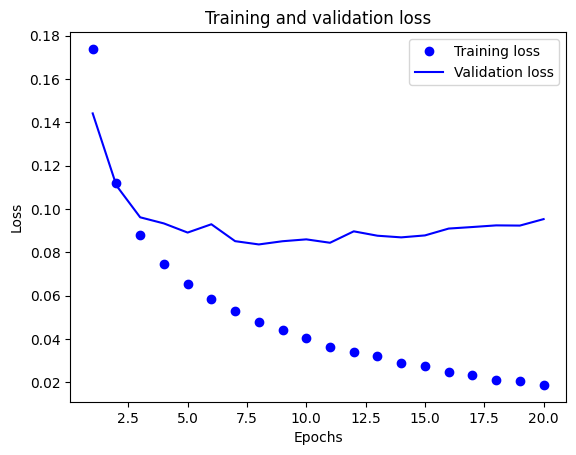

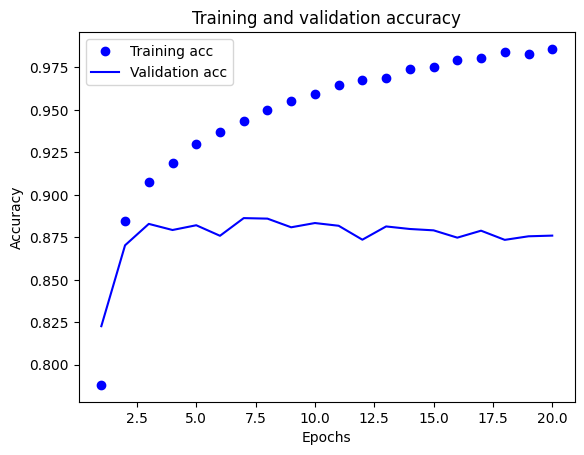

In [65]:
loss_value_tanh_647= historydict_tanh_647["loss"]
val_loss_value_tanh_647 = historydict_tanh_647["val_loss"]
epochs_tanh = range(1, len(loss_value_tanh_647) + 1)
plot647.plot(epochs_tanh, loss_value_tanh_647, "bo", label="Training loss")
plot647.plot(epochs_tanh, val_loss_value_tanh_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
acc_tanh = historydict_tanh_647["accuracy"]
val_acc_tanh = historydict_tanh_647["val_accuracy"]
plot647.plot(epochs_tanh, acc_tanh, "bo", label="Training acc")
plot647.plot(epochs_tanh, val_acc_tanh, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Training the tanh model for 8 epochs and evaluating it on the test set.**

In [66]:
tanh_647.fit(x_train, y_train, epochs=8, batch_size=512)
results_tanh_647 = tanh_647.evaluate(x_test, y_test)
results_tanh_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9405 - loss: 0.0490
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.9537 - loss: 0.0409
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9601 - loss: 0.0366
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9637 - loss: 0.0342
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9675 - loss: 0.0316
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9688 - loss: 0.0302
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9739 - loss: 0.0269
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9751 - loss: 0.0260
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8624 - loss: 0.1084


[0.1056099534034729, 0.8668799996376038]

Adam Operator with 16 units and 3-layers

**# Defining, compiling, and training a model with the Adam optimizer for 20 epochs.**

In [67]:
adam_647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
     layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

adam_647.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

x_adam_647 = x_train[:10000]
partial_x_train_16 = x_train[10000:]

y_adam_647 = y_train[:10000]
partial_y_train_16 = y_train[10000:]


historyadam_647 = adam_647.fit(partial_x_train_16,
                    partial_y_train_16,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_adam_647, y_adam_647))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.6794 - loss: 0.6317 - val_accuracy: 0.8581 - val_loss: 0.3981
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9003 - loss: 0.3120 - val_accuracy: 0.8900 - val_loss: 0.2799
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9417 - loss: 0.1794 - val_accuracy: 0.8854 - val_loss: 0.2906
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9656 - loss: 0.1179 - val_accuracy: 0.8835 - val_loss: 0.3093
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9791 - loss: 0.0832 - val_accuracy: 0.8810 - val_loss: 0.3485
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9888 - loss: 0.0551 - val_accuracy: 0.8769 - val_loss: 0.3957
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9951 - loss: 0.0349 - val_accuracy: 0.8742 - val_loss: 0.4427
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9970 - loss: 0.0223 - val_accuracy: 0.8734 - v

**# Extracting and displaying the keys from the training history of the Adam optimizer model.**

In [68]:
historydict_adam_647 = historyadam_647.history
historydict_adam_647.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting the training and validation loss and accuracy for the Adam optimizer model.**

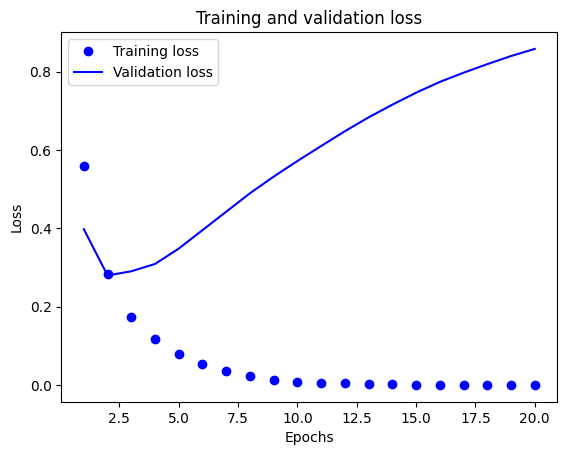

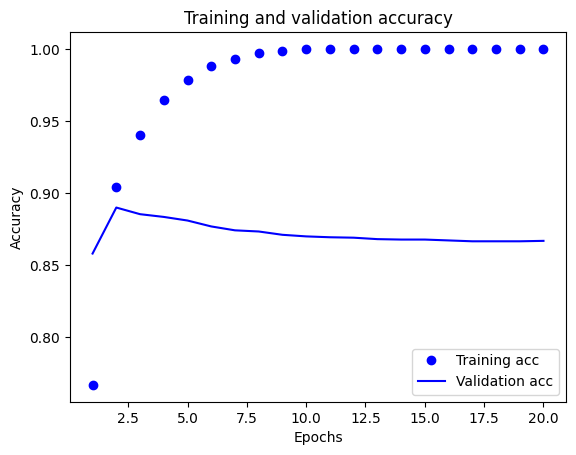

In [69]:
loss_value_adam_647 = historydict_adam_647["loss"]
val_loss_value_adam_647 = historydict_adam_647["val_loss"]
epochs_adam = range(1, len(loss_value_adam_647) + 1)
plot647.plot(epochs_adam, loss_value_adam_647, "bo", label="Training loss")
plot647.plot(epochs_adam, val_loss_value_adam_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_adam = historydict_adam_647["accuracy"]
val_acc_adam = historydict_adam_647["val_accuracy"]
plot647.plot(epochs_adam, acc_adam, "bo", label="Training acc")
plot647.plot(epochs_adam, val_acc_adam, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Training the Adam optimizer model for 4 epochs and evaluating its performance on the test set.**

In [70]:
adam_647.fit(x_train, y_train, epochs=4, batch_size=512)
results_adam = adam_647.evaluate(x_test, y_test)
results_adam

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9371 - loss: 0.2947
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9675 - loss: 0.1098
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9852 - loss: 0.0613
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9921 - loss: 0.0405
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8563 - loss: 0.5531


[0.5533235669136047, 0.8574399948120117]

Regularization model with 16 units and 2-layers

**# Defining and training a model with L2 regularization on the dense layers and evaluating its performance.**

In [71]:
from tensorflow.keras import regularizers
regularization647 = keras.Sequential([
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation="sigmoid")
])
regularization647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_regularization647 = regularization647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_regularization647 = history_regularization647.history
historydict_regularization647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.6849 - loss: 0.6530 - val_accuracy: 0.8577 - val_loss: 0.4552
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8889 - loss: 0.3976 - val_accuracy: 0.8834 - val_loss: 0.3671
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9169 - loss: 0.3073 - val_accuracy: 0.8870 - val_loss: 0.3390
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9319 - loss: 0.2634 - val_accuracy: 0.8796 - val_loss: 0.3472
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9457 - loss: 0.2274 - val_accuracy: 0.8858 - val_loss: 0.3275
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9543 - loss: 0.2036 - val_accuracy: 0.8848 - val_loss: 0.3331
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9623 - loss: 0.1906 - val_accuracy: 0.8741 - val_loss: 0.3752
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9581 - loss: 0.1890 - val_accuracy: 0.8815 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting training and validation loss and accuracy for the model with L2 regularization.**

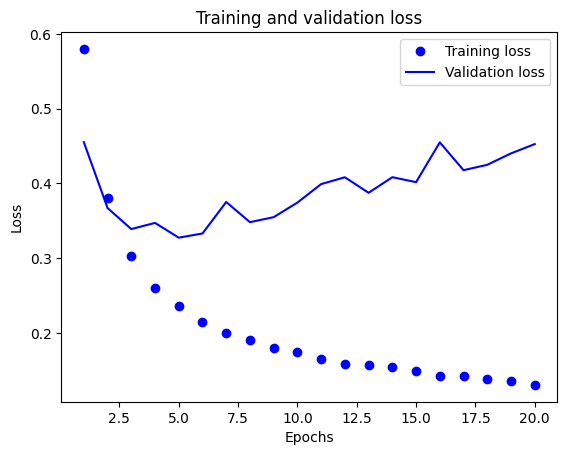

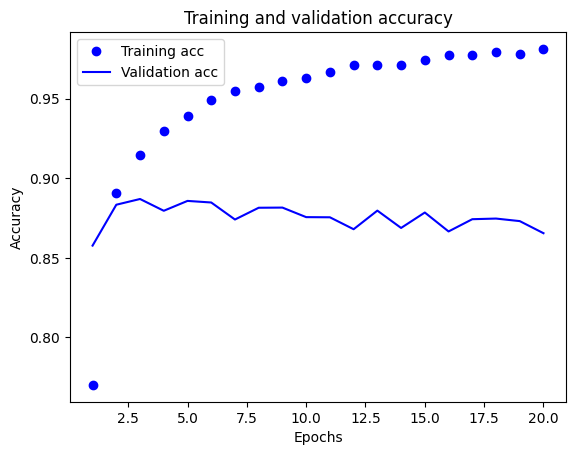

In [72]:
loss_valu_647 = historydict_regularization647["loss"]
val_loss_value_r_647 = historydict_regularization647["val_loss"]
epochs_r = range(1, len(loss_valu_647) + 1)
plot647.plot(epochs_r, loss_valu_647, "bo", label="Training loss")
plot647.plot(epochs_r, val_loss_value_r_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()

plot647.clf()
acc_r = historydict_regularization647["accuracy"]
val_acc_r = historydict_regularization647["val_accuracy"]
plot647.plot(epochs_r, acc_r, "bo", label="Training acc")
plot647.plot(epochs_r, val_acc_r, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Training and evaluating the model with L2 regularization for 8 epochs.**

In [73]:
regularization647.fit(x_train, y_train, epochs=8, batch_size=512)
results_regularization_647 = regularization647.evaluate(x_test, y_test)
results_regularization_647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9396 - loss: 0.2528
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.9524 - loss: 0.1998
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9594 - loss: 0.1829
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9640 - loss: 0.1708
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9646 - loss: 0.1662
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9671 - loss: 0.1619
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9655 - loss: 0.1628
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9710 - loss: 0.1540
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8642 - loss: 0.4343


[0.4305916130542755, 0.8685600161552429]

Dropout function with 16 units and 3-layers

**# Defining a model with dropout layers, compiling, and fitting it for 20 epochs with validation.**

In [74]:
from tensorflow.keras import regularizers
Dropout647 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Dropout647.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_Dropout_647 = Dropout647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
historydict_Dropout_647 = history_Dropout_647.history
historydict_Dropout_647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.5631 - loss: 0.6837 - val_accuracy: 0.7499 - val_loss: 0.6256
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7289 - loss: 0.6129 - val_accuracy: 0.8350 - val_loss: 0.5389
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8147 - loss: 0.5388 - val_accuracy: 0.8315 - val_loss: 0.4690
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.8528 - loss: 0.4679 - val_accuracy: 0.8631 - val_loss: 0.4463
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8813 - loss: 0.4261 - val_accuracy: 0.8733 - val_loss: 0.3941
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8881 - loss: 0.3854 - val_accuracy: 0.8587 - val_loss: 0.4154
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9014 - loss: 0.3414 - val_accuracy: 0.8691 - val_loss: 0.3662
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9149 - loss: 0.3038 - val_accuracy: 0.8698 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting training and validation loss, and accuracy for the model with dropout layers.**

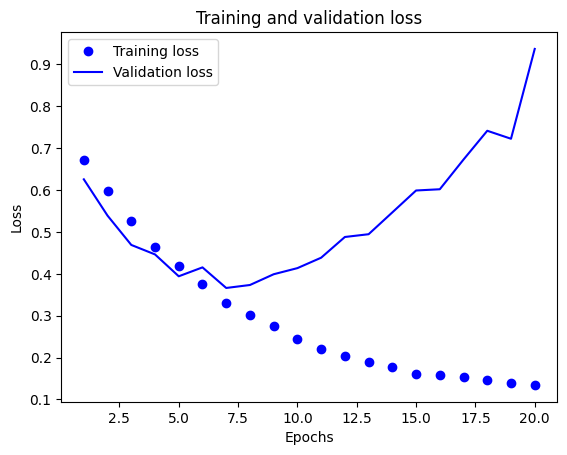

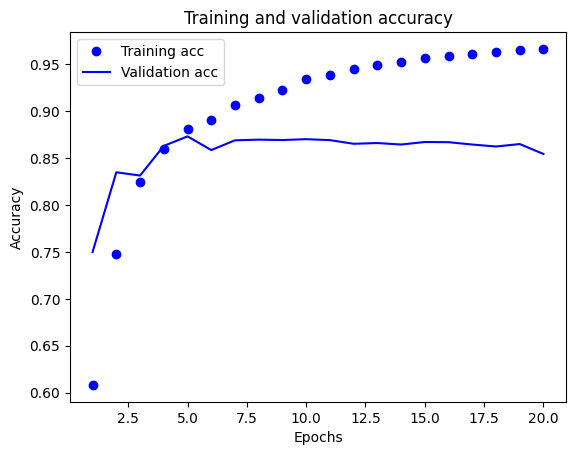

In [75]:
loss_val_647 = historydict_Dropout_647["loss"]
val_loss_val_d_647 = historydict_Dropout_647["val_loss"]
epochs_d = range(1, len(loss_val_647) + 1)
plot647.plot(epochs_d, loss_val_647, "bo", label="Training loss")
plot647.plot(epochs_d, val_loss_val_d_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_d = historydict_Dropout_647["accuracy"]
val_acc_d = historydict_Dropout_647["val_accuracy"]
plot647.plot(epochs_d, acc_d, "bo", label="Training acc")
plot647.plot(epochs_d, val_acc_d, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Fitting the Dropout model for 8 epochs and evaluating it on the test data.**

In [76]:
Dropout647.fit(x_train, y_train, epochs=8, batch_size=512)
results_Dropout647 = Dropout647.evaluate(x_test, y_test)
results_Dropout647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9101 - loss: 0.3866
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9152 - loss: 0.3057
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9230 - loss: 0.2645
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9302 - loss: 0.2363
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9373 - loss: 0.2198
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9364 - loss: 0.2137
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9381 - loss: 0.2124
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9435 - loss: 0.1974
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8585 - loss: 0.5623


[0.5447589755058289, 0.8576800227165222]

Training model with hyper tuned parameters with 32 units and 3 -layers

**# Defining and training a model with L2 regularization and dropout layers, using RMSprop optimizer and MSE loss function.**

In [77]:
from tensorflow.keras import regularizers
Hyper647 = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Hyper647.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_Hyper647 = Hyper647.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dictHyper647 = history_Hyper647.history
history_dictHyper647.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.5528 - loss: 0.2556 - val_accuracy: 0.8217 - val_loss: 0.1947
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.7155 - loss: 0.2057 - val_accuracy: 0.8646 - val_loss: 0.1302
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8113 - loss: 0.1547 - val_accuracy: 0.8779 - val_loss: 0.1050
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.8594 - loss: 0.1258 - val_accuracy: 0.8757 - val_loss: 0.1040
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8883 - loss: 0.1043 - val_accuracy: 0.8849 - val_loss: 0.0988
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9088 - loss: 0.0914 - val_accuracy: 0.8851 - val_loss: 0.1012
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9259 - loss: 0.0775 - val_accuracy: 0.8820 - val_loss: 0.1050
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9361 - loss: 0.0696 - val_accuracy: 0.8818 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**# Plotting training and validation loss and accuracy over epochs for the model with L2 regularization and dropout.**

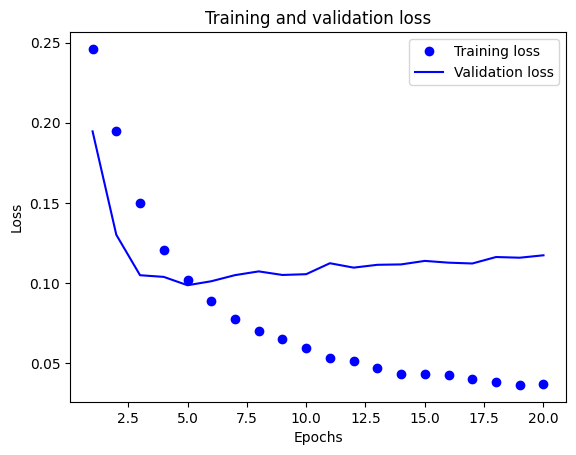

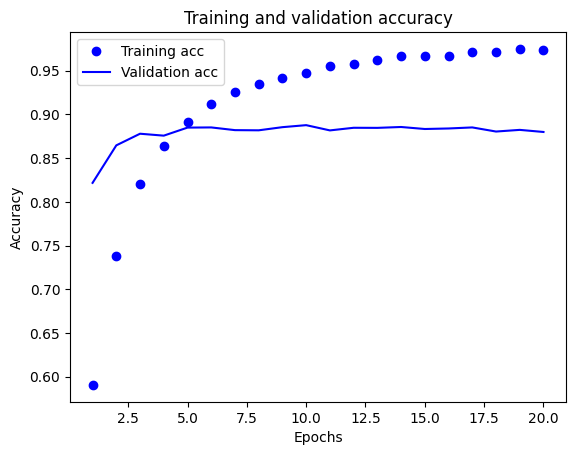

In [78]:
loss_va_h_647 = history_dictHyper647["loss"]
val_loss_va_h_647 = history_dictHyper647["val_loss"]
epochs_h = range(1, len(loss_va_h_647) + 1)
plot647.plot(epochs_h, loss_va_h_647, "bo", label="Training loss")
plot647.plot(epochs_h, val_loss_va_h_647, "b", label="Validation loss")
plot647.title("Training and validation loss")
plot647.xlabel("Epochs")
plot647.ylabel("Loss")
plot647.legend()
plot647.show()


plot647.clf()
acc_h = history_dictHyper647["accuracy"]
val_acc_h = history_dictHyper647["val_accuracy"]
plot647.plot(epochs_h, acc_h, "bo", label="Training acc")
plot647.plot(epochs_h, val_acc_h, "b", label="Validation acc")
plot647.title("Training and validation accuracy")
plot647.xlabel("Epochs")
plot647.ylabel("Accuracy")
plot647.legend()
plot647.show()

**# Fitting the Hyper647 model on the training data for 8 epochs and evaluating it on the test data.**

In [79]:
Hyper647.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hyper647 = Hyper647.evaluate(x_test, y_test)
results_Hyper647

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9285 - loss: 0.0719
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9406 - loss: 0.0631
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9473 - loss: 0.0584
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9477 - loss: 0.0565
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9519 - loss: 0.0535
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.9578 - loss: 0.0490
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9586 - loss: 0.0478
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9595 - loss: 0.0467
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8778 - loss: 0.1172


[0.11505742371082306, 0.8802800178527832]

**Create a scatter plot showing the accuracy vs. loss for different models, annotate each point with model labels, and display the plot with axis labels and a title**

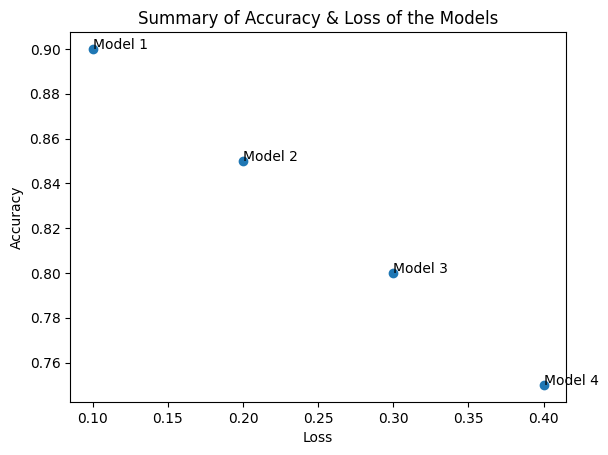

In [80]:
Models_Loss = [0.1, 0.2, 0.3, 0.4]  # Example loss values
Models_Accuracy = [0.9, 0.85, 0.8, 0.75]  # Example accuracy values
Labels = ['Model 1', 'Model 2', 'Model 3', 'Model 4']  # Labels for each point

fig, axis = plot647.subplots()
axis.scatter(Models_Loss, Models_Accuracy)
for i, txt in enumerate(Labels):
    axis.annotate(txt, (Models_Loss[i], Models_Accuracy[i]))
plot647.title("Summary of Accuracy & Loss of the Models")
plot647.ylabel("Accuracy")
plot647.xlabel("Loss")

plot647.show()


**Description**

The data was imported, and the analysis settings were adjusted before constructing a basic neural network with a single hidden layer of 16 units, using binary cross-entropy and ReLU activation. Further experiments focused on improving the model's performance by modifying the number of hidden layers (ranging from one to three) and the number of units per layer (32, 64, and 128). Although increasing the number of hidden units generally improved accuracy, there was a risk of overfitting. Additionally, switching from binary cross-entropy to mean squared error (MSE) loss did not noticeably impact the model's performance. Overall, the results indicated that while tweaking the architecture and parameters could enhance accuracy, careful consideration of loss functions and overfitting prevention was crucial.